# Module loading and function defined

In [1]:
import mlrose_hiive
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import warnings
from IPython.display import display
import IPython.display as ipd
import mlrose_hiive
from functools import partial

# sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, validation_curve
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score, completeness_score

# plot setting fix
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.rcParams.update({'font.size': 15})

# notification of completing the code

sound = []
def SoundNotification():
    global sound
    sr = 22050 # sample rate
    T = 90    # seconds
    t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
    x = 0.5*np.sin(2*np.pi*1000*t)              # pure sine wave at 440 Hz
    sound = ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array

    return sound

def done():    
    sound = SoundNotification()
    return sound
random_seed = 56

## Data preprocessing

In [2]:
# =================== diabetes =========================
# load file
diabetes_dataset = pd.read_csv("diabetes.csv")

# check if there's any NA for both files, if yes, then drop
diabetes_dataset.isnull().any().any()
diabetes_dataset.dropna()

# set the random seed as 56
np.random.seed(56)
print("diabetes information:", diabetes_dataset.info())

# remove unnecessary column
cleaned_diabetes_data = diabetes_dataset.drop(columns = ["PatientID"], inplace = False) # patientID is meaningless

# normalized the data
normalized = preprocessing.MinMaxScaler().fit_transform(cleaned_diabetes_data.values)
cleaned_diabetes_data = pd.DataFrame(normalized, columns = cleaned_diabetes_data.columns)
# print(cleaned_diabetes_data.shape)
cleaned_diabetes_data.head(n = 10)

# =================== phishing =========================
# load file
phishing_dataset = pd.read_csv("phishing.csv")

# check if there's any NA for both files, if yes, then drop
phishing_dataset.isnull().any().any()
phishing_dataset.dropna()

# set the random seed as 56
np.random.seed(56)
random_seed = 56
print("phishing information:", phishing_dataset.info())

# remove unnecessary column
cleaned_phishing_data = phishing_dataset.drop(columns = ["Index"], inplace = False) # patientID is meaningless

# normalized the data
normalized = preprocessing.MinMaxScaler().fit_transform(cleaned_phishing_data.values)
cleaned_phishing_data = pd.DataFrame(normalized, columns = cleaned_phishing_data.columns)
cleaned_phishing_data.head(n = 10)

### for diabetes ==============
diabetes_data_split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2, random_state=56)

for train_index, test_index in diabetes_data_split.split(cleaned_diabetes_data, cleaned_diabetes_data["Diabetic"]):
    diabetes_training_set = cleaned_diabetes_data.loc[train_index]
    diabetes_testing_set = cleaned_diabetes_data.loc[test_index]
# trainng data    
diabetes_train_X = diabetes_training_set.copy(deep= True).drop("Diabetic", axis=1)
diabetes_train_y = diabetes_training_set.copy(deep= True)[["Diabetic"]]
# testing data
diabetes_test_X = diabetes_testing_set.copy(deep= True).drop("Diabetic", axis=1)
diabetes_test_y = diabetes_testing_set.copy(deep= True)[["Diabetic"]]
# get data
diabetes_train_X.info(), diabetes_train_y.info(), diabetes_test_X.info(), diabetes_test_y.info()

### for phishing ==============
phishing_data_split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2, random_state=56)

for train_index, test_index in phishing_data_split.split(cleaned_phishing_data, cleaned_phishing_data["class"]):
    phishing_training_set = cleaned_phishing_data.loc[train_index]
    phishing_testing_set = cleaned_phishing_data.loc[test_index]
# trainng data    
phishing_train_X = phishing_training_set.copy(deep= True).drop("class", axis=1)
phishing_train_y = phishing_training_set.copy(deep= True)[["class"]]
# testing data
phishing_test_X = phishing_testing_set.copy(deep= True).drop("class", axis=1)
phishing_test_y = phishing_testing_set.copy(deep= True)[["class"]]
# get data
phishing_train_X.info(), phishing_train_y.info(), phishing_test_X.info(), phishing_test_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
diabetes information: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------          

(None, None, None, None)

In [3]:
phishing_dataset = pd.read_csv("phishing.csv")
diabetes_dataset = pd.read_csv("diabetes.csv")

diabetes_dataset.drop(["PatientID"], axis=1 ,inplace=True)

diabetesX = diabetes_dataset.drop("Diabetic", 1).copy().values
diabetesY = diabetes_dataset["Diabetic"].copy().values
diabetes_x_df = diabetes_dataset.drop("Diabetic",1)


phishing_dataset.drop(["Index"], axis=1 ,inplace=True)
phishingX = phishing_dataset.drop("class", 1).copy().values
phishingY = phishing_dataset["class"].copy().values
phishing_x_df = phishing_dataset.drop("class",1)


min_max_scaler = preprocessing.MinMaxScaler()
diabetesX = min_max_scaler.fit_transform(diabetesX)
diabetesX_df = pd.DataFrame(diabetesX, columns=diabetes_x_df.columns)
phishingX = min_max_scaler.fit_transform(phishingX)
phishingX_df = pd.DataFrame(phishingX, columns=phishing_x_df.columns)

# K Means

## Diabetes

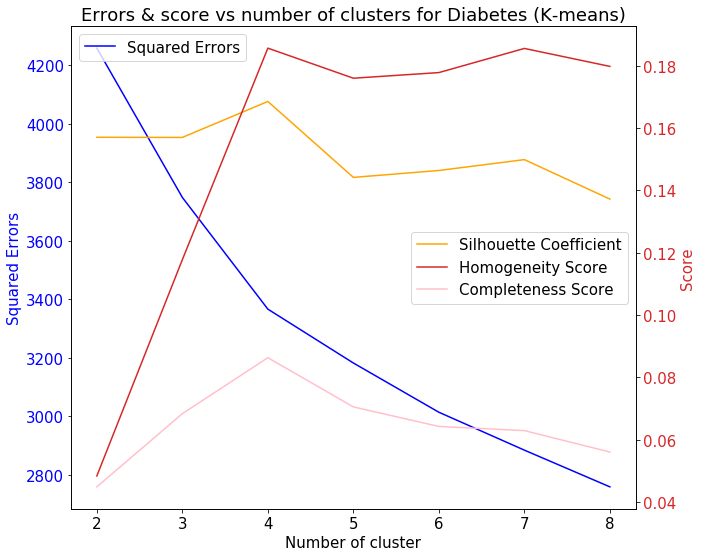

In [59]:
clusters_range = list(range(2,9,1))
SE = []
silh = []
homog = []
CS = []
for cluster in clusters_range:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_seed, 
                    n_jobs=-2, algorithm = "auto").fit(diabetesX)
    k_label = kmeans.labels_
    sil_coeff = silhouette_score(diabetesX, k_label, metric='euclidean')
    homog_score = homogeneity_score(diabetesY, k_label)
    com_score = completeness_score(diabetesY, k_label)
    silh.append(sil_coeff)
    homog.append(homog_score)
    SE.append(kmeans.inertia_)
    CS.append(com_score)
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Squared Errors', color="blue")
ln1 = ax1.plot(clusters_range, SE, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh, color="orange")
ln3 = ax2.plot(clusters_range, homog, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Diabetes (K-means)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [58]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(diabetesX)
accuracy_score(kmeans.labels_, diabetesY)

0.4049333333333333

## Phishing

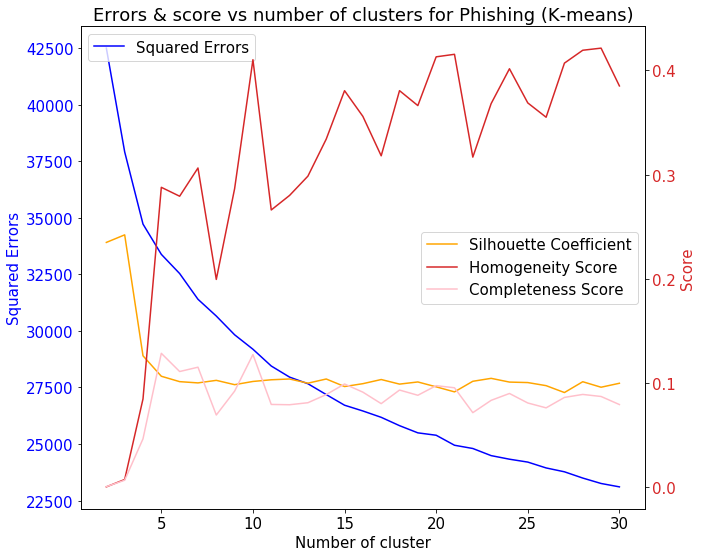

In [62]:
clusters_range = list(range(2,31,1))
SE = []
silh = []
homog = []
CS = []
for cluster in clusters_range:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_seed, 
                    n_jobs=-2, algorithm = "auto").fit(phishingX)
    k_label = kmeans.labels_
    sil_coeff = silhouette_score(phishingX, k_label, metric='euclidean')
    homog_score = homogeneity_score(phishingY, k_label)
    CS_score = completeness_score(phishingY, k_label)
    silh.append(sil_coeff)
    homog.append(homog_score)
    SE.append(kmeans.inertia_)
    CS.append(CS_score)
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Squared Errors', color="blue")
ln1 = ax1.plot(clusters_range, SE, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh, color="orange")
ln3 = ax2.plot(clusters_range, homog, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Phishing (K-means)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [57]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(phishingX)
print(kmeans.labels_)
accuracy_score((kmeans.labels_), phishingY)

[1 1 1 ... 1 0 1]


0.4658946987515831

## Expectation Maximization

## Diabetes

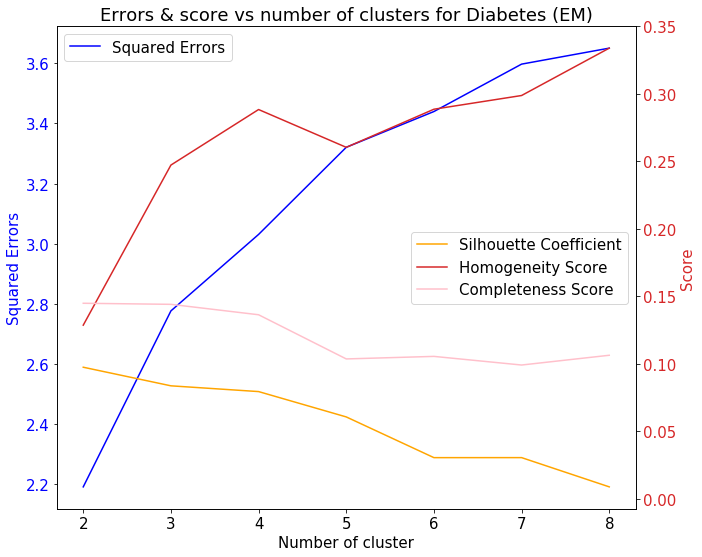

In [61]:
clusters_range = list(range(2,9,1))
log_likelihood_EM = []
silh_EM = []
homog_EM = []
CS = []
for cluster in clusters_range:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state = random_seed, 
                          n_init=5).fit(diabetesX)
    gmm_label = gmm.predict(diabetesX)
    sil_coeff = silhouette_score(diabetesX, gmm_label, metric='euclidean')
    homog_score = homogeneity_score(diabetesY, gmm_label)
    comp_score = completeness_score(diabetesY, gmm_label)
    silh_EM.append(sil_coeff)
    homog_EM.append(homog_score)
    CS.append(comp_score)
    log_likelihood_EM.append(gmm.score(diabetesX))
    print("the calculation progress is: " + str(int(cluster / clusters_range[-1] * 100)) + "%", end = "\r")
    
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Log_likelihood', color="blue")
ln1 = ax1.plot(clusters_range, log_likelihood_EM, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh_EM, color="orange")
ln3 = ax2.plot(clusters_range, homog_EM, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Diabetes (EM)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Phishing

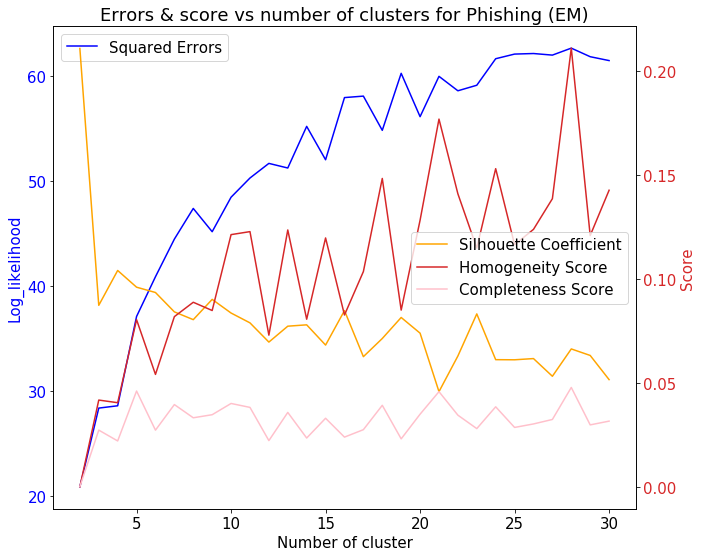

In [63]:
clusters_range = list(range(2,31,1))
log_likelihood_EM = []
silh_EM = []
homog_EM = []
CS = []
for cluster in clusters_range:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state = random_seed, 
                          n_init=5).fit(phishingX)
    gmm_label = gmm.predict(phishingX)
    sil_coeff = silhouette_score(phishingX, gmm_label, metric='euclidean')
    homog_score = homogeneity_score(phishingY, gmm_label)
    comp_score = completeness_score(phishingY, gmm_label)
    silh_EM.append(sil_coeff)
    homog_EM.append(homog_score)
    CS.append(comp_score)
    log_likelihood_EM.append(gmm.score(phishingX))
    print("the calculation progress is: " + str(int(cluster / clusters_range[-1] * 100)) + "%", end = "\r")
    
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Log_likelihood', color="blue")
ln1 = ax1.plot(clusters_range, log_likelihood_EM, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh_EM, color="orange")
ln3 = ax2.plot(clusters_range, homog_EM, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Phishing (EM)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Neural Network

## Diabetes

In [4]:
# cross validation test
def cvtest(train_X_set, train_y_set, selected_classifier, calculation, average='binary', fold=10, classifier_type = "DT_classifier"):
    data_size = len(train_X_set)
    train_accuracy, validation_accuracy = [], []
    num_sample = []
    grid_size = 1000
    starting_size = 100
    for i in range(starting_size, data_size, grid_size):
        print("the calculation progress is: " + str(int(i / data_size * 100)) + "%", end = "\r")
        train_X, train_y = train_X_set[:i], train_y_set[: i]
        k_fold = StratifiedKFold(n_splits = fold, random_state = None, shuffle = False)
        training_list = []
        validation_list = []
        for train_index, test_index in k_fold.split(train_X, train_y):
            # get training and testin x, y data
            train_X_part, train_y_part, test_X_part, test_y_part = train_X.iloc[train_index], train_y.iloc[train_index], train_X.iloc[test_index], train_y.iloc[test_index]
            # use the classifier for training
            if classifier_type == "adaBoost" or classifier_type == "KNN" or classifier_type == "SVM" or classifier_type == "Neural Network":
                selected_classifier.fit(train_X_part.values, train_y_part.values.ravel()) # needed to be flattened
            else:
                selected_classifier.fit(train_X_part.values, train_y_part.values)
            # get the predicted results from training_y and testing_y
            train_y_prediction, test_y_prediction = selected_classifier.predict(train_X_part), selected_classifier.predict(test_X_part)
            # do different calculation of average
            training_list.append(calculation(train_y_part.values, train_y_prediction, average=average))
            validation_list.append(calculation(test_y_part.values, test_y_prediction, average=average))

        train_accuracy.append(np.mean(training_list))
        validation_accuracy.append(np.mean(validation_list))
        num_sample.append(i)
        
    return train_accuracy, validation_accuracy, num_sample

# plot the learning curve
def plot_lc(cv_study, title):
    num_sample = cv_study[2]
    new_x = [100 * x / num_sample[-1] for x in num_sample]
    plt.plot(new_x, cv_study[0], "r-x", linewidth=2.5, label="training")
    plt.plot(new_x, cv_study[1], "b-x", linewidth=2.5, label="validation")
    plt.title(title)
    plt.legend()
    plt.xlabel('Percentage of training samples (%)')
    plt.ylabel('Accuracy')
    plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
    plt.savefig("diabetes_" + title + ".png")

        
def plot_optimization(training, testing, parameter, title, variable):
    plt.plot(parameter, training, "r-x", linewidth = 2.5, label = "training")
    plt.plot(parameter, testing, "b-x", linewidth = 2.5, label = "validation")
    plt.title(title)
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel(variable)
    plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
    plt.savefig("diabetes_" + title + ".png")


In [8]:
kmeans = KMeans(n_clusters=4, n_init=50, max_iter=1000, random_state=44, 
                n_jobs=-2).fit(diabetes_train_X)
label = kmeans.labels_

In [12]:
X_kmeans = label.reshape(12000,1)
print((X_kmeans.shape))
print(diabetes_train_y.shape)

(12000, 1)
(12000, 1)


In [20]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
start_time = time.time()
neural_net = MLPClassifier(activation='relu', hidden_layer_sizes= (50, 100),alpha = 0.05, learning_rate= 'constant')
neural_net.fit(X_kmeans, diabetes_train_y)
end_time = time.time()
Kmeans_time = end_time - start_time

In [21]:
print(Kmeans_time)

7.130527973175049


In [18]:
diabetes_NN_predict_y = neural_net.predict(diabetes_test_X) 
print(diabetes_NN_predict_y)
diabetes_test_scores = f1_score(diabetes_test_y, diabetes_NN_predict_y, average="weighted") 
print(diabetes_test_scores)

[0. 0. 1. ... 1. 0. 0.]
0.9117046190642283


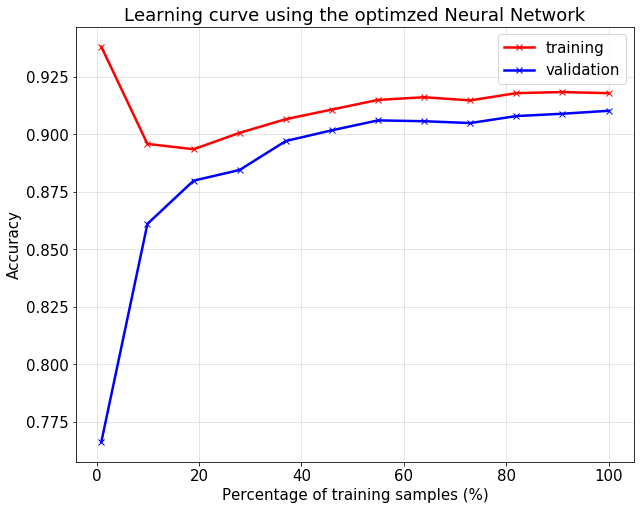

In [14]:
from sklearn.metrics import f1_score
f1_scores = cvtest(diabetes_train_X, diabetes_train_y, neural_net, f1_score, 
                      average="weighted")
plot_lc(f1_scores ,title="Learning curve using the optimzed Neural Network")


## EM algorithm

In [22]:
gmm = GaussianMixture(n_components=3, max_iter=100, random_state=random_seed, 
                      n_init=5).fit(diabetes_train_X)
label = gmm.predict(diabetes_train_X)

In [23]:
X_em = label.reshape(12000,1)

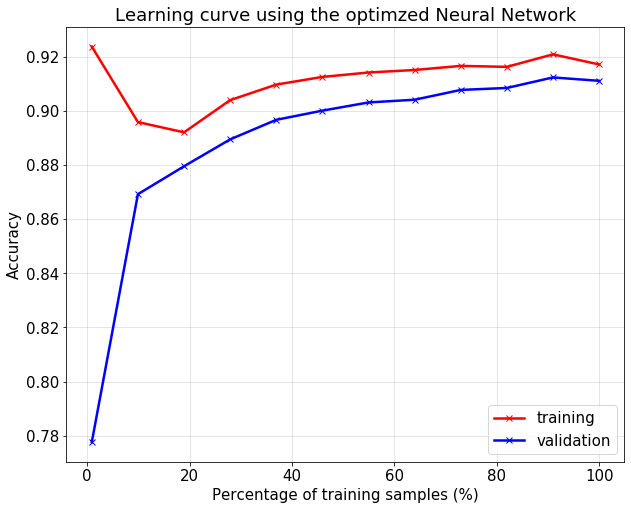

In [25]:
from sklearn.metrics import f1_score
f1_scores = cvtest(diabetes_train_X, diabetes_train_y, NN_EM, f1_score, 
                      average="weighted")
plot_lc(f1_scores ,title="Learning curve using the optimzed Neural Network")


## Phishing